In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pymc3 as pm

%matplotlib inline

# Chapter 03

## Easy

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


class Distribution:
    def __init__(self, prior=None):
        self.posterior = None
        if prior is None:
            self.grid_size = 20
            self.prior = self._standardize(np.ones(self.grid_size))
        else:
            self.grid_size = len(prior)
            self.prior = self._standardize(prior)
        self.grid = np.linspace(0,1, self.grid_size)
        self.tries = 0
        self.successes = 0
        
    def _standardize(self, dist):
        return dist / dist.sum()
        
    def update(self, successes, tries):
        likelihood = stats.binom.pmf(successes, tries, self.grid)
        if self.posterior is not None:
            self.prior = self.posterior
        self.posterior = self._standardize(self.prior * likelihood)
        self.tries = tries
        self.successes = successes
    
    def plot(self):
        fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True)
        ax1.plot(self.grid, self.prior, label='prior')
        ax1.set_title("Prior")
        if self.posterior is not None:
            ax2.plot(self.grid, self.posterior, label='posterior')
            ax2.set_title('Posterior ({:d} tries, {:d} successes)'.format(self.tries, self.successes))
        for x in (ax1, ax2):
            x.set_xlabel('true value of p')
            x.set_ylabel('posterior probability')
            x.legend()

In [9]:
d = Distribution(prior=np.ones(1000))
d.update(6,9)
np.random.seed(100)
samples = np.random.choice(d.grid, size=int(1e4), p=d.posterior, replace=True)

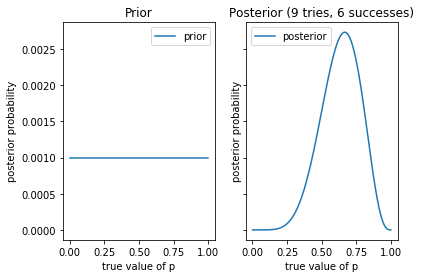

In [10]:
d.plot()

## 3E1

In [13]:
samples[samples < 0.2].size / samples.size

0.001

## 3E2

In [16]:
samples[samples > 0.8].size / samples.size

0.1209

## 3E3

In [19]:
samples[(samples < 0.8) & (samples > 0.2)].size / samples.size

0.8781

## 3E4

In [25]:
np.percentile(samples, 20)

0.51551551551551555

## 3E5

In [26]:
np.percentile(samples, 80)

0.75975975975975973

## 3E6

In [34]:
pm.hpd(samples, alpha=0.34)

array([ 0.51651652,  0.78878879])

## 3E7

In [36]:
np.percentile(samples, [17, 83])

array([ 0.4984985 ,  0.77294294])

## Medium

## 3M1

In [3]:
d = Distribution(prior=np.ones(1000))
d.update(8,15)
np.random.seed(100)
medium_samples = np.random.choice(d.grid, size=int(1e4), p=d.posterior, replace=True)

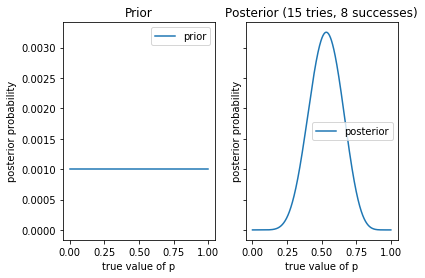

In [4]:
d.plot()

## 3M2

In [5]:
pm.hpd(medium_samples, alpha=0.1)

array([ 0.33733734,  0.72572573])

## 3M3